In [7]:
%matplotlib inline
from operator import itemgetter
import json
import itertools
from logger import Logger
import argparse
import numpy as np
import matplotlib as mpl

import matplotlib.ticker as tck
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
from scipy.signal import savgol_filter
from scipy.interpolate import splprep, splev
import pandas as pd

In [8]:
def get_mi(rho,d):
    return -0.5*d*(np.log(1-rho**2))

In [69]:
def mi_plot(ax, experiments, rho_list, d_list, title='Mutual Information', labels=None, hide_leg=False):
    
    y_base=0.1
    y_label='MI'
    legend_label=''
    
    exlog = experiments 

    key1 = 'mi'
    key2 = 'mi'

    #Choose colors
    color_idx = np.linspace(0, 1, len(experiments)+1)
    c_list = []
    for i in range(len(color_idx)):
        c_list.append(plt.cm.hsv(color_idx[i]))
        
    x, y = [], []
    for id_no,run_id in enumerate(exlog):

        try:
            logger = Logger.load(run_id)
        except ValueError:
            continue
        
        y = [v[key1] for v in logger.get(key2)]
        #y = savgol_filter(y,11,1)
        x = np.arange(len(y))
        
        ax.xaxis.set_major_locator(tck.MultipleLocator(base=10))
        
        label = '\u03C1'+'='+str(labels[id_no])
        ax.plot(x, y, label=label, color=c_list[id_no])
        ax.axhline(y=get_mi(rho_list[id_no],d_list[id_no]),linestyle='--',color=c_list[id_no])

    #ax.yaxis.set_major_locator(tck.MultipleLocator(base=y_base))
    
    ax.set_xlabel('Epoch',fontsize=12)
    ax.set_ylabel(y_label,fontsize=12)
    
    if title is not None:
        ax.set_title(title,fontsize=12)
    
    if not hide_leg:
        ax.legend(loc='lower center',bbox_to_anchor=(1.2,0.1),fontsize=12,frameon=False,ncol=1,fancybox=True)
    #ax.legend(prop={'size': 10},frameon=False)

### increasing datasize for fixed model

In [88]:
def get_exp_list(dim_size):
    
    experiments = ['mnist_sample_exp_{0}d_0.2_mi'.format(str(2*dim_size[0])),\
                   'mnist_sample_exp_{0}d_0.4_mi'.format(str(2*dim_size[1])),\
                   'mnist_sample_exp_{0}d_0.6_mi'.format(str(2*dim_size[2])),\
                   'mnist_sample_exp_{0}d_0.8_mi'.format(str(2*dim_size[3])),\
                   'mnist_sample_exp_{0}d_0.9_mi'.format(str(2*dim_size[4]))]
    return experiments

In [89]:
rho_list = [0.2,0.4,0.6,0.8,0.9]

In [90]:
d_list = np.array([1,1,1,1,1])

In [91]:
experiments = get_exp_list(d_list)

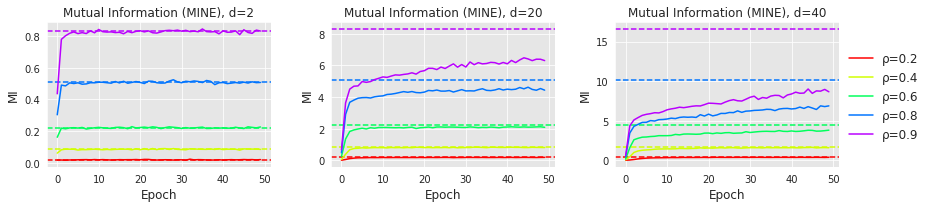

In [92]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(1 + 3*4, 3), sharey=False)
mi_plot(ax1,experiments=get_exp_list(d_list),rho_list=rho_list,d_list=d_list,\
        title='Mutual Information (MINE), d=2',labels=rho_list,hide_leg=True)
mi_plot(ax2,experiments=get_exp_list(10*d_list),rho_list=rho_list,d_list=10*d_list,\
        title='Mutual Information (MINE), d=20',labels=rho_list,hide_leg=True)
mi_plot(ax3,experiments=get_exp_list(20*d_list),rho_list=rho_list,d_list=20*d_list,\
        title='Mutual Information (MINE), d=40',labels=rho_list)
fig.tight_layout()
fig.savefig('Plots/increasing_datasize.pdf', format='pdf', bbox_inches='tight' )

### increasing the model size for fixed datasize

In [93]:
def get_exp_list_1(dim_size,model_size):
    
    experiments = ['mnist_sample_exp_{0}d_0.2_{1}_mi'.format(str(2*dim_size[0]),str(model_size[0])),\
                   'mnist_sample_exp_{0}d_0.4_{1}_mi'.format(str(2*dim_size[1]),str(model_size[1])),\
                   'mnist_sample_exp_{0}d_0.6_{1}_mi'.format(str(2*dim_size[2]),str(model_size[2])),\
                   'mnist_sample_exp_{0}d_0.8_{1}_mi'.format(str(2*dim_size[3]),str(model_size[3])),\
                   'mnist_sample_exp_{0}d_0.9_{1}_mi'.format(str(2*dim_size[4]),str(model_size[4]))]
    return experiments

In [94]:
rho_list = [0.2,0.4,0.6,0.8,0.9]

In [95]:
d_list = np.array([1,1,1,1,1])

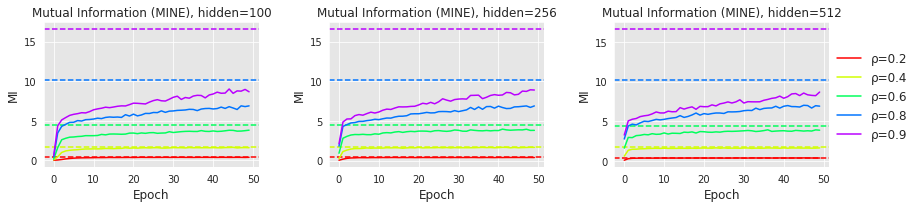

In [98]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(1 + 3*4, 3), sharey=False)

mi_plot(ax1,experiments=get_exp_list(20*d_list),rho_list=rho_list,d_list=20*d_list,\
        title='Mutual Information (MINE), hidden=100',labels=rho_list,hide_leg=True)
mi_plot(ax2,experiments=get_exp_list_1(20*d_list,model_size=256*d_list),rho_list=rho_list,d_list=20*d_list,\
        title='Mutual Information (MINE), hidden=256',labels=rho_list,hide_leg=True)
mi_plot(ax3,experiments=get_exp_list_1(20*d_list,model_size=512*d_list),rho_list=rho_list,d_list=20*d_list,\
        title='Mutual Information (MINE), hidden=512',labels=rho_list)
fig.tight_layout()
fig.savefig('Plots/increasing_model_size.pdf', format='pdf', bbox_inches='tight' )